# Tugas Praktikum

**Nama : Daffa Yudisa Akbar**

**Kelas : TI-3A / 06**

**NIM : 2241720008**

---

Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'

2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

3. Buatlah model K-Means dengan mempertimbangkan jumlah kk yang terbaik.

4. Buatlah  implementasi model SOM untuk segmentasi citra lain

Jawab:

## 1. Gunakan data 'Mall_Customers.csv'

* Import Library dan Mempersiapkan Data

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/drive/MyDrive/Machine_Learning/Jobsheet7-Data/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

* Mengambil Fitur yang akan digunakan

In [302]:
# Seleksi Fitur

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


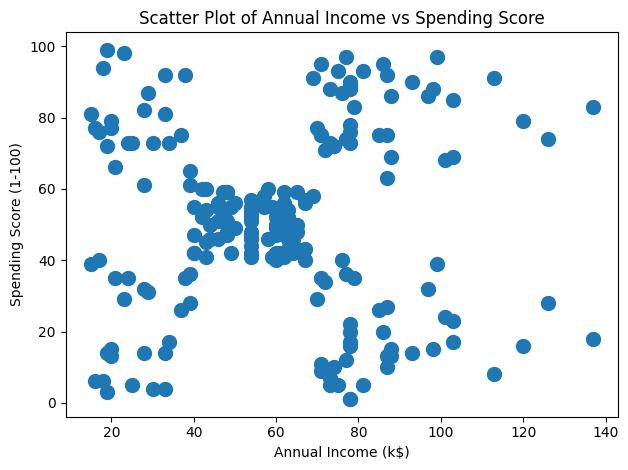

In [303]:
# Membuat scatter plot berdasarkan fitur yang dipilih
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.tight_layout()
plt.show()

## 3. Buatlah model K-Means dengan mempertimbangkan jumlah kk yang terbaik.

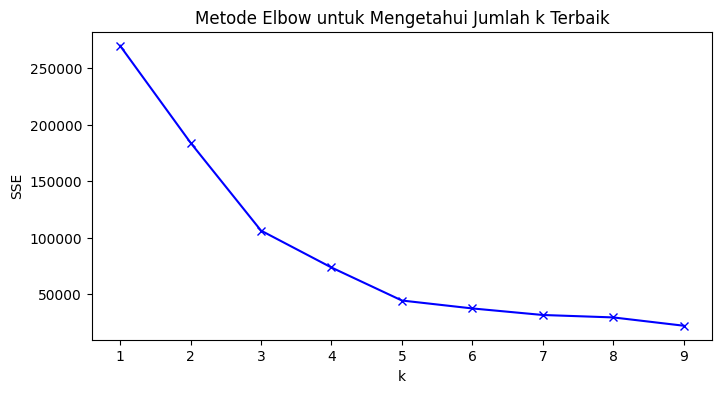

In [304]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

Dari gambar di atas, dapat dilihat bahwa nilai k = 3 merupakan nilai k terbaik. Hal ini diarenakan terlihat lekukan atau elbow berada di sana, serta selisih antara nilai k nya juga besar

In [305]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28000000014
k=2; SSE=184131.8850278851
k=3; SSE=106348.37306211119
k=4; SSE=73679.78903948837
k=5; SSE=44448.45544793369
k=6; SSE=37442.24745037571
k=7; SSE=31644.31903792021
k=8; SSE=29490.88964547357
k=9; SSE=22143.222100767438


In [335]:
# Jika dilihat dari penurunan grafik maka nilai dari k yang paling optimal adalah 4
# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=3)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

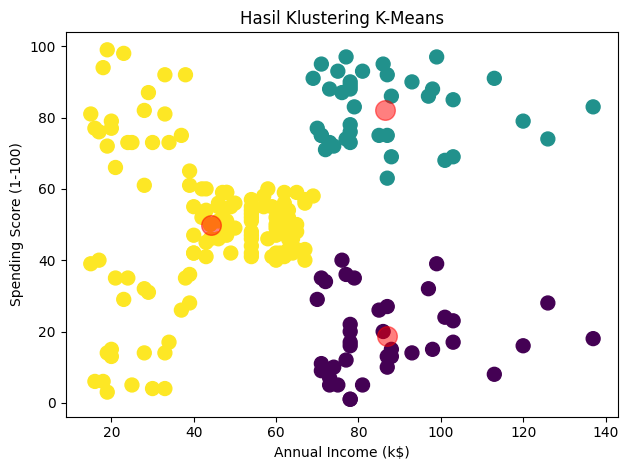

In [336]:
# Plot hasi cluster
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title("Hasil Klustering K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.tight_layout()

# Menampilkan plot
plt.show()

## 4. Buatlah implementasi model SOM untuk segmentasi citra lain

In [308]:
pip install minisom

* Import Library

In [309]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

* Fungsi untuk menginisialisasi bobot SOM

In [310]:
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

* Fungsi untuk menghitung jarak antara vektor input dan bobot SOM

In [311]:
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

* Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)

In [312]:
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

* Fungsi untuk memperbarui bobot SOM

In [313]:
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

* Fungsi untuk melatih SOM

In [314]:
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

* Mempersiapkan Data

In [315]:
image_path = '/content/drive/MyDrive/Machine_Learning/Jobsheet7-Data/Cute_Cat.jpg'
image = io.imread(image_path) / 255.0

* Latih SOM

In [316]:
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius)

* Visualisasi bobot SOM


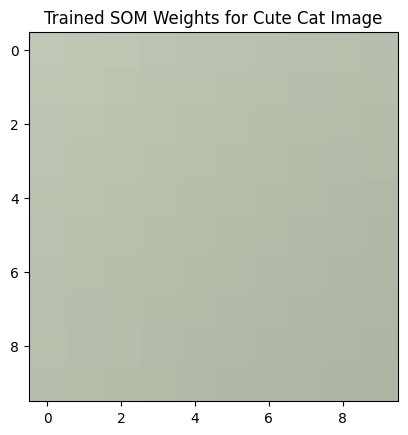

In [317]:
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Cute Cat Image')
plt.show()